In [1]:
!pip install dask[complete]


In [5]:
import dask
import dask.bag as db
from dask.distributed import Client

client = Client()
client


C:\Users\Waqas\anaconda3\Lib\site-packages\distributed\node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 56157 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:56157/status,
Dashboard: http://127.0.0.1:56157/status,Workers: 4
Total threads: 8,Total memory: 7.75 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:56158,Workers: 4
Dashboard: http://127.0.0.1:56157/status,Total threads: 8
Started: Just now,Total memory: 7.75 GiB
Comm: tcp://127.0.0.1:56177,Total threads: 2
Dashboard: http://127.0.0.1:56180/status,Memory: 1.94 GiB
Nanny: tcp://127.0.0.1:56161,


In [7]:
!pip install requests


In [9]:
import requests
response = requests.get("https://www.wikipedia.org", timeout=5)
response.status_code


403

In [11]:
!pip install beautifulsoup4


In [13]:
from bs4 import BeautifulSoup
soup = BeautifulSoup("<p>Hello</p>", "html.parser")
soup.get_text()


'Hello'

In [17]:
!pip install lxml

In [19]:
from bs4 import BeautifulSoup
BeautifulSoup("<p>Hello</p>", "lxml").get_text()


'Hello'

In [21]:
from bs4 import BeautifulSoup

# Sample HTML
html = "<html><body><h1>Hello World!</h1><p>This is a test.</p></body></html>"
soup = BeautifulSoup(html, 'html.parser')

# Extract text
text = soup.get_text()
print(text)


Hello World!This is a test.


In [23]:
!pip install pandas


In [25]:
import pandas as pd

# Simple test: create a DataFrame
data = {'Word': ['hello', 'world', 'test'], 'Count': [5, 3, 7]}
df = pd.DataFrame(data)

print(df)


    Word  Count
0  hello      5
1  world      3
2   test      7


In [27]:
!pip install matplotlib


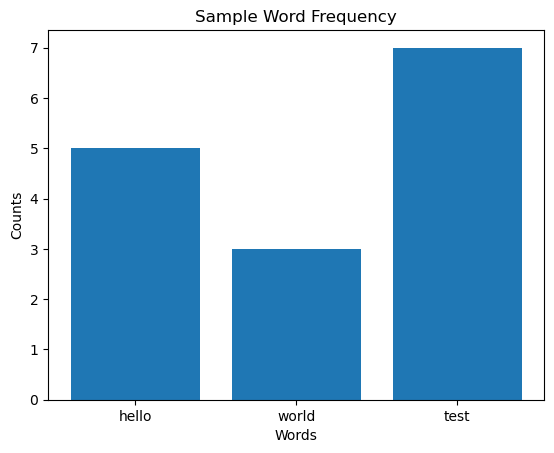

In [29]:
import matplotlib.pyplot as plt

# Sample data
words = ['hello', 'world', 'test']
counts = [5, 3, 7]

plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Sample Word Frequency')
plt.show()


In [31]:
import requests

def fetch_page(url):
    """
    Fetch the HTML content of a webpage.
    """
    try:
        response = requests.get(url)
        if response.status_code == 200:
            return response.text
        else:
            return ""
    except:
        return ""


In [33]:
url = "https://example.com"
html = fetch_page(url)
print(html[:200])  # Print first 200 characters of the page


<!doctype html><html lang="en"><head><title>Example Domain</title><meta name="viewport" content="width=device-width, initial-scale=1"><style>body{background:#eee;width:60vw;margin:15vh auto;font-famil


In [35]:
from bs4 import BeautifulSoup

def parse_words(html):
    """
    Parse HTML and return a list of words (lowercase, alphabetic only)
    """
    soup = BeautifulSoup(html, 'html.parser')
    text = soup.get_text()
    words = text.split()
    words = [word.lower() for word in words if word.isalpha()]
    return words


In [37]:
words = parse_words(html)
print(words[:20])  # Print first 20 words


['example', 'domainexample', 'domainthis', 'domain', 'is', 'for', 'use', 'in', 'documentation', 'examples', 'without', 'needing', 'avoid', 'use', 'in', 'more']


In [39]:
urls = [
    'https://byjus.com/cbse/essay-on-computer/',
    'https://www.example.org',
    'https://www.ibm.com/think/topics/parallel-computing'
]


In [41]:
import dask.bag as db

# Create a Dask Bag from the URLs
bag = db.from_sequence(urls)

# Fetch pages in parallel
html_pages = bag.map(fetch_page)

# Parse words from each page
words_bag = html_pages.map(parse_words).flatten()  # flatten merges all word lists

# Count word frequencies
word_counts = words_bag.frequencies().compute()

# Convert to dictionary
word_counts_dict = dict(word_counts)
print(word_counts_dict)


{'words': 1, 'essay': 6, 'on': 43, 'computer': 24, 'a': 71, 'is': 41, 'an': 20, 'electronic': 1, 'device': 2, 'that': 22, 'performs': 1, 'complex': 9, 'it': 12, 'wonderful': 1, 'product': 1, 'of': 76, 'modern': 4, 'computers': 35, 'have': 6, 'become': 3, 'significant': 1, 'part': 4, 'our': 5, 'whether': 1, 'in': 63, 'the': 112, 'sector': 1, 'education': 4, 'or': 13, 'are': 40, 'used': 25, 'progress': 1, 'entirely': 1, 'dependent': 2, 'powered': 1, 'by': 13, 'latest': 3, 'this': 2, 'also': 6, 'covers': 1, 'history': 4, 'as': 19, 'well': 1, 'their': 6, 'uses': 6, 'different': 5, 'going': 2, 'through': 6, 'students': 2, 'will': 6, 'get': 1, 'idea': 1, 'writing': 4, 'good': 1, 'after': 3, 'practising': 1, 'they': 6, 'be': 10, 'able': 2, 'to': 86, 'write': 1, 'essays': 3, 'other': 7, 'topics': 2, 'related': 2, 'such': 8, 'invention': 3, 'has': 8, 'made': 1, 'lives': 1, 'for': 35, 'many': 10, 'securing': 1, 'data': 14, 'software': 4, 'desktop': 1, 'and': 90, 'mouse': 1, 'laptop': 2, 'form': 

In [44]:
# Optional: install NLTK if not installed
!pip install nltk

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Filter out stopwords from word_counts
filtered_word_counts = {word: count for word, count in word_counts_dict.items() if word not in stop_words}


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Waqas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
import pandas as pd

# Convert to DataFrame
df = pd.DataFrame(list(filtered_word_counts.items()), columns=['Word', 'Count'])

# Sort by count descending
df = df.sort_values('Count', ascending=False).head(20)  # Top 20 words
print(df)


           Word  Count
276    parallel     73
66    computing     60
246       class     36
10    computers     35
17         used     25
2      computer     24
469       cloud     17
297      serial     16
292      memory     16
46         data     14
305  processing     13
330       tasks     13
288  processors     12
277         ibm     12
282    problems     12
287    multiple     11
412          ai     11
540      hybrid     11
44         many     10
290       using     10


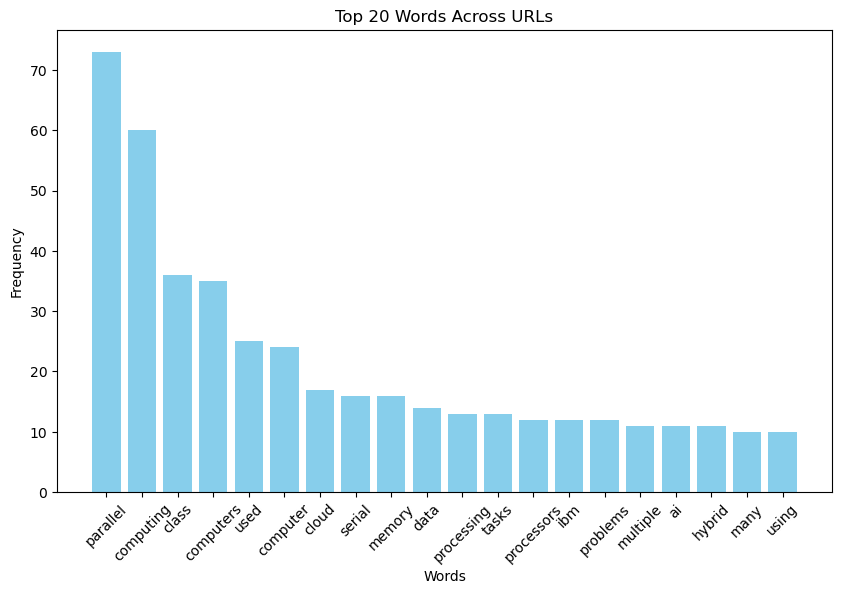

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(df['Word'], df['Count'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words Across URLs')
plt.xticks(rotation=45)
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Waqas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


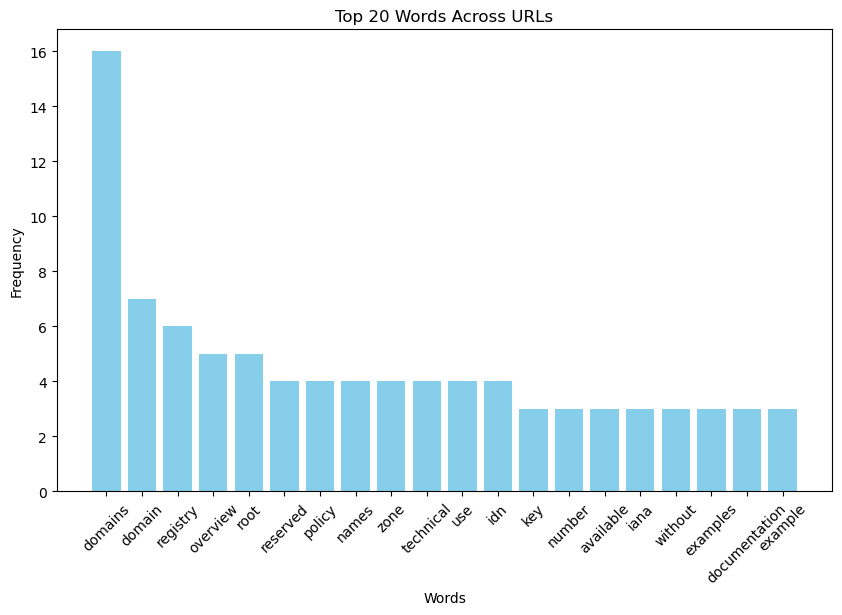

In [51]:
import requests
from bs4 import BeautifulSoup
import dask.bag as db
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Download stopwords once
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# --- Functions ---
def fetch_page(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            return response.text
    except:
        return ""

def parse_words(html):
    soup = BeautifulSoup(html, 'html.parser')
    text = soup.get_text()
    words = [word.lower() for word in text.split() if word.isalpha()]
    return words

# --- List of URLs ---
urls = [
    'https://example.com',
    'https://www.example.org',
    'https://www.iana.org/domains/reserved'
]

# --- Dask Bag for Parallel Crawling ---
bag = db.from_sequence(urls)
html_pages = bag.map(fetch_page)
words_bag = html_pages.map(parse_words).flatten()
word_counts = words_bag.frequencies().compute()
word_counts_dict = dict(word_counts)

# --- Remove Stopwords ---
filtered_word_counts = {word: count for word, count in word_counts_dict.items() if word not in stop_words}

# --- Convert to DataFrame and Sort ---
df = pd.DataFrame(list(filtered_word_counts.items()), columns=['Word', 'Count'])
df = df.sort_values('Count', ascending=False).head(20)

# --- Plot Results ---
plt.figure(figsize=(10,6))
plt.bar(df['Word'], df['Count'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words Across URLs')
plt.xticks(rotation=45)
plt.show()

# --- Save Results ---
df.to_csv('word_frequency_results.csv', index=False)


In [53]:
import time

In [55]:
# Sequential fetching and parsing
start_seq = time.time()

all_words_seq = []

for url in urls:
    html = fetch_page(url)
    words = parse_words(html)
    all_words_seq.extend(words)

# Count word frequencies
from collections import Counter
word_counts_seq = Counter([w for w in all_words_seq if w not in stop_words])

end_seq = time.time()
print(f"Sequential crawling time: {end_seq - start_seq:.2f} seconds")


Sequential crawling time: 3.08 seconds


In [59]:
import dask.bag as db

# Start timer
import time
start_dask = time.time()

# Create Dask Bag
bag = db.from_sequence(urls)
html_pages = bag.map(fetch_page)
words_bag = html_pages.map(parse_words).flatten()

# Count word frequencies
word_counts_dask = dict(words_bag.frequencies().compute())

# Remove stopwords (if used)
word_counts_dask = {w: c for w, c in word_counts_dask.items() if w not in stop_words}

end_dask = time.time()
print(f"Dask parallel crawling time: {end_dask - start_dask:.2f} seconds")


Dask parallel crawling time: 1.31 seconds


In [61]:
# Sequential top 5 words
print("Top 5 words (Sequential):", word_counts_seq.most_common(5))

# Dask top 5 words
top_dask = dict(sorted(word_counts_dask.items(), key=lambda x: x[1], reverse=True)[:5])
print("Top 5 words (Dask):", top_dask)


Top 5 words (Sequential): [('domains', 16), ('domain', 7), ('registry', 6), ('overview', 5), ('root', 5)]
Top 5 words (Dask): {'domains': 16, 'domain': 7, 'registry': 6, 'overview': 5, 'root': 5}


In [63]:
import requests
from bs4 import BeautifulSoup
import dask.bag as db
import time
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download stopwords once
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# --- Functions ---
def fetch_page(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            return response.text
    except:
        return ""

def parse_words(html):
    soup = BeautifulSoup(html, 'html.parser')
    text = soup.get_text()
    words = [word.lower() for word in text.split() if word.isalpha()]
    return words

# --- URLs to Crawl ---
urls = [
    'https://example.com',
    'https://www.example.org',
    'https://www.iana.org/domains/reserved'
]

# -------------------
# Sequential Crawling
# -------------------
start_seq = time.time()

all_words_seq = []
for url in urls:
    html = fetch_page(url)
    words = parse_words(html)
    all_words_seq.extend(words)

# Remove stopwords
all_words_seq = [w for w in all_words_seq if w not in stop_words]

# Count word frequencies
word_counts_seq = Counter(all_words_seq)

end_seq = time.time()
print(f"Sequential crawling time: {end_seq - start_seq:.2f} seconds")
print("Top 5 words (Sequential):", word_counts_seq.most_common(5))

# -------------------
# Dask Parallel Crawling
# -------------------
start_dask = time.time()

bag = db.from_sequence(urls)
html_pages = bag.map(fetch_page)
words_bag = html_pages.map(parse_words).flatten()
word_counts_dask = dict(words_bag.frequencies().compute())

# Remove stopwords
word_counts_dask = {w: c for w, c in word_counts_dask.items() if w not in stop_words}

end_dask = time.time()
print(f"Dask parallel crawling time: {end_dask - start_dask:.2f} seconds")

# Top 5 words Dask
top_dask = dict(sorted(word_counts_dask.items(), key=lambda x: x[1], reverse=True)[:5])
print("Top 5 words (Dask):", top_dask)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Waqas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sequential crawling time: 2.96 seconds
Top 5 words (Sequential): [('domains', 16), ('domain', 7), ('registry', 6), ('overview', 5), ('root', 5)]
Dask parallel crawling time: 1.52 seconds
Top 5 words (Dask): {'domains': 16, 'domain': 7, 'registry': 6, 'overview': 5, 'root': 5}


In [67]:
!pip install wordcloud

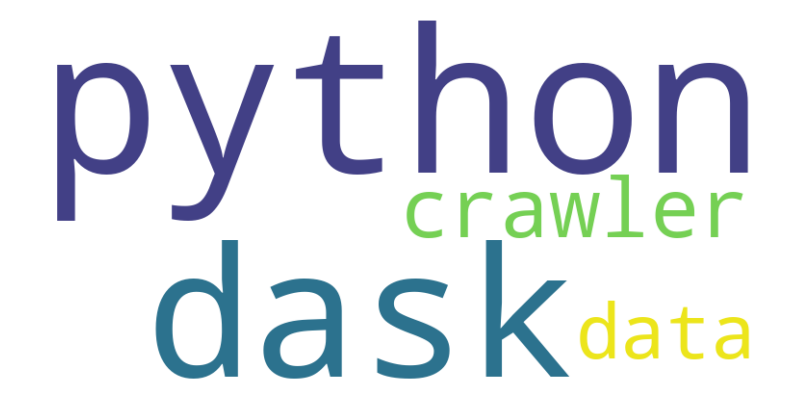

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

sample_words = {'python': 10, 'dask': 8, 'crawler': 6, 'data': 5}

wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(sample_words)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


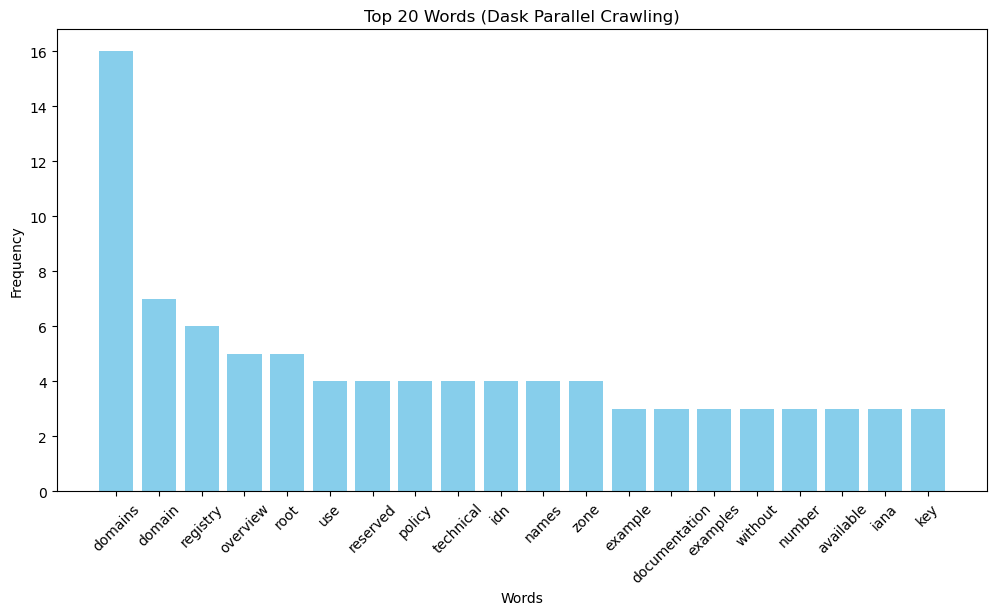

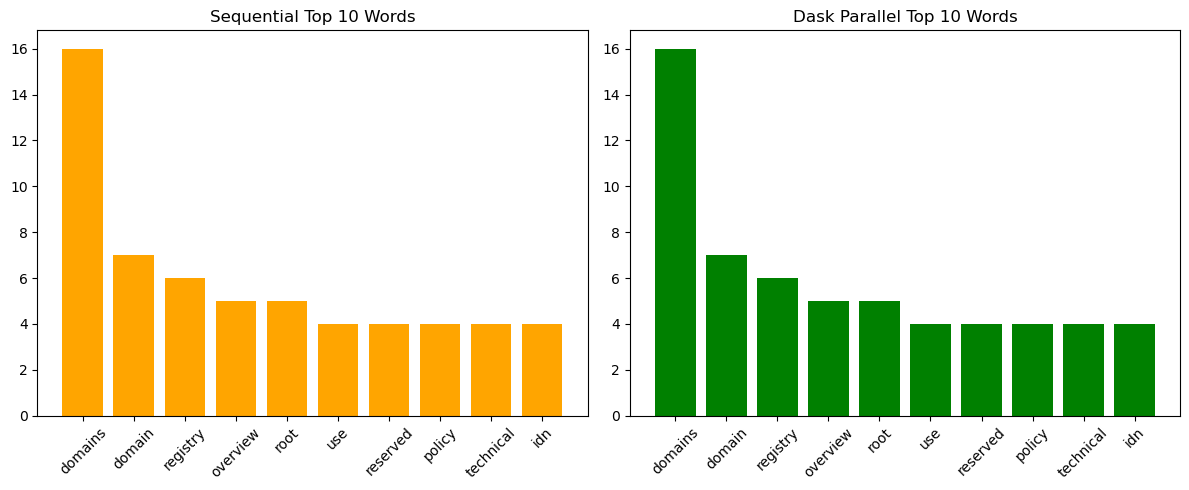

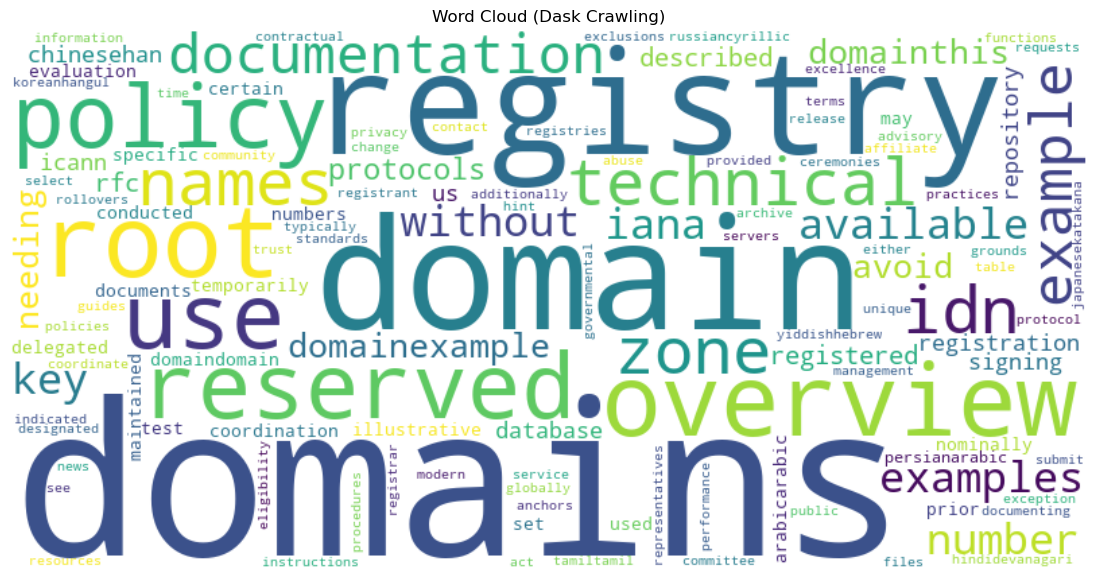

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud

# -----------------------
# 1. Top 20 Words Bar Chart (Dask)
# -----------------------
df = pd.DataFrame(sorted(word_counts_dask.items(), key=lambda x:x[1], reverse=True)[:20],
                  columns=['Word','Count'])

plt.figure(figsize=(12,6))
plt.bar(df['Word'], df['Count'], color='skyblue')
plt.title('Top 20 Words (Dask Parallel Crawling)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# ----------------------------------------
# 2. Sequential vs Dask Top 10 Words Comparison
# ----------------------------------------
df_seq = pd.DataFrame(word_counts_seq.most_common(10), columns=['Word','Count'])
df_dask = pd.DataFrame(sorted(word_counts_dask.items(), key=lambda x:x[1], reverse=True)[:10], columns=['Word','Count'])

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.bar(df_seq['Word'], df_seq['Count'], color='orange')
plt.title("Sequential Top 10 Words")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.bar(df_dask['Word'], df_dask['Count'], color='green')
plt.title("Dask Parallel Top 10 Words")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# -----------------------
# 3. Word Cloud (Dask Crawling)
# -----------------------
wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts_dask)
plt.figure(figsize=(15,7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud (Dask Crawling)')
plt.show()
